# Pymaceuticals Inc.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
mouse_study_df.shape

(1893, 8)

In [6]:
mouse_study_df.info

<bound method DataFrame.info of      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        f932          0           45.000000                 0     Ketapril   
2        g107          0           45.000000                 0     Ketapril   
3        a457          0           45.000000                 0     Ketapril   
4        c819          0           45.000000                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   
1890     p438         45           61.433892                 1     Ceftamin   
1891     x773         45           58.634971                 4      Placebo   
1892     b879         45           72.555239                 2     Stelasyn   

         Sex  Age_m

In [7]:
# Checking the number of mice.
num_mice = mouse_study_df["Mouse ID"].nunique()
num_mice

249

In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_df.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False).head(10)

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
a203      0            1
q633      0            1
q610      20           1
          25           1
          30           1
dtype: int64

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_rows = mouse_study_df["Mouse ID"] == "g989"
mouse_study_df.loc[duplicate_mouse_rows]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse_drop = mouse_study_df["Mouse ID"] != "g989"
clean_mouse_data = mouse_study_df.loc[duplicate_mouse_drop].reset_index(drop=True)
clean_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_data["Mouse ID"].nunique()

248

## Summary Statistics

In [12]:
clean_mouse_data["Drug Regimen"].unique()

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_mean = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_median = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_variance = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_std = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_sem = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Combine the data
mouse_data = {
    "Average Tumor Volume": tumor_mean,
    "Median Tumor Volume": tumor_median,
    "Tumor Volume Variance": tumor_variance,
    "Tumor Volume Standard Deviation": tumor_std,
    "Tumor Volume SEM": tumor_sem
    
}

# Assemble the resulting series into a single summary DataFrame.
combined_data = pd.DataFrame.from_dict(mouse_data)
combined_data

,Average Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# aggregate
agg_columns = {
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
}

using_agg_fxn = clean_mouse_data.groupby(["Drug Regimen"]).agg(agg_columns).reset_index()

# I got help from the Xpert Learning Assistant to figure out how to rename everything because of the mutliIndex
# new column names
new_columns = {
    ('Drug Regimen', ''): "Drug Regimen",
    ("Tumor Volume (mm3)", "mean"): "Average Tumor Volume", 
    ("Tumor Volume (mm3)", "median"): "Median Tumor Volume", 
    ("Tumor Volume (mm3)", "var"): "Tumor Volume Variance", 
    ("Tumor Volume (mm3)", "std"): "Tumor Volume Standard Deviation", 
    ("Tumor Volume (mm3)", "sem"): "Tumor SEM"
}

# rename the columns
using_agg_fxn.columns = [new_columns[col] if col in new_columns else col for col in using_agg_fxn.columns]

# Display with renamed columns
using_agg_fxn

,Drug Regimen,Average Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

In [15]:
clean_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


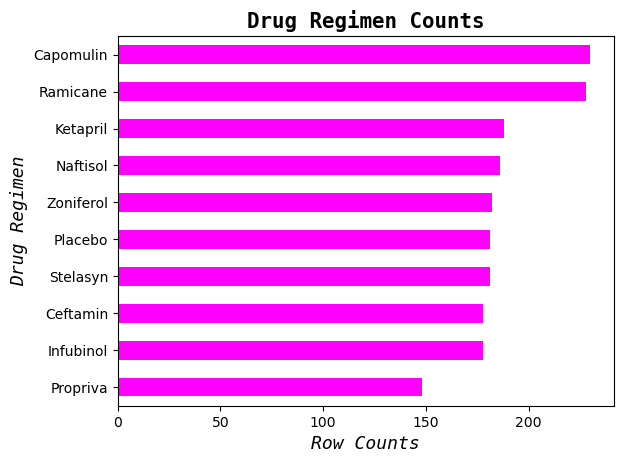

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# plot the bar plot
ax = clean_mouse_data["Drug Regimen"].value_counts().sort_values().plot(kind="barh", color="magenta")

# set titles and labels
ax.set_title("Drug Regimen Counts", fontsize=15, fontweight="bold", fontname="monospace")
ax.set_xlabel("Row Counts", fontsize=13, fontstyle="italic", fontname="monospace")
ax.set_ylabel("Drug Regimen", fontsize=13, fontstyle="italic", fontname="monospace")
plt.show()

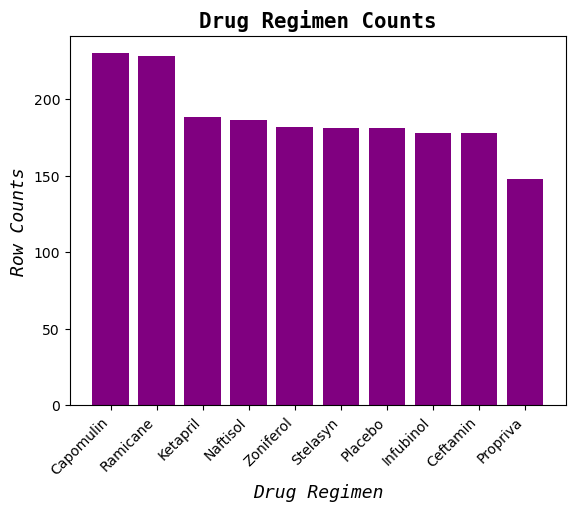

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Declare the data for x and y axis

# I got some help from Prof Booths suggestions as well as the XPert for reminders on how to adjust the angle on this
data = clean_mouse_data["Drug Regimen"].value_counts()
x = list(data.index)
y = list(data.values)

# Create bar graph using pyplot
plt.bar(x, y, color='purple')

# labels and title
plt.xlabel('Drug Regimen', fontsize=13, fontname='monospace', fontstyle='italic')
plt.ylabel('Row Counts', fontsize=13, fontname='monospace', fontstyle='italic')
plt.title("Drug Regimen Counts", fontsize=15, fontweight="bold", fontname="monospace")

# Adjust the angle of the drug regimens to read them
plt.xticks(rotation=45, ha='right')
plt.show()



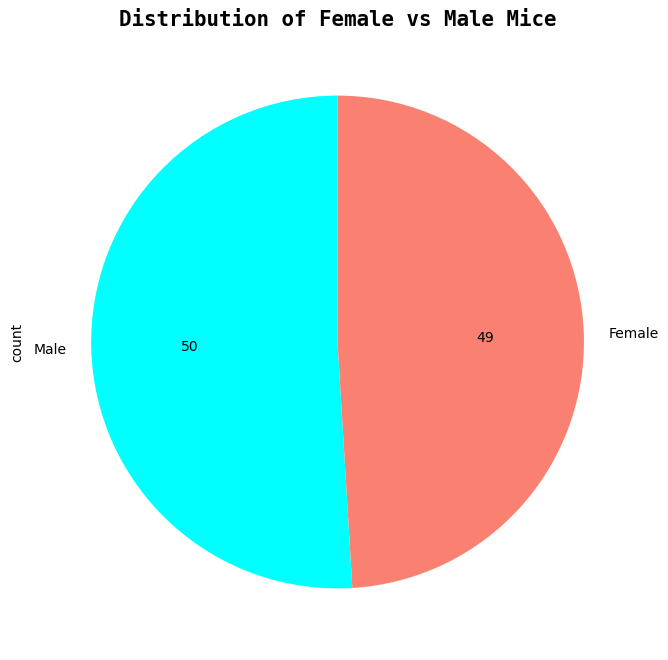

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Get the data
data2 = clean_mouse_data["Sex"].value_counts()

# colors
colors = ['cyan', 'salmon']

# Plot it!
plt.figure(figsize=(8, 8))
pie = data2.plot(kind='pie', labels=data2.index, colors=colors, startangle=90, autopct=lambda x: f'{int(x)}')

plt.title('Distribution of Female vs Male Mice', fontsize=15, fontweight="bold", fontname="monospace")


plt.show()


In [19]:
data2

Sex
Male      958
Female    922
Name: count, dtype: int64

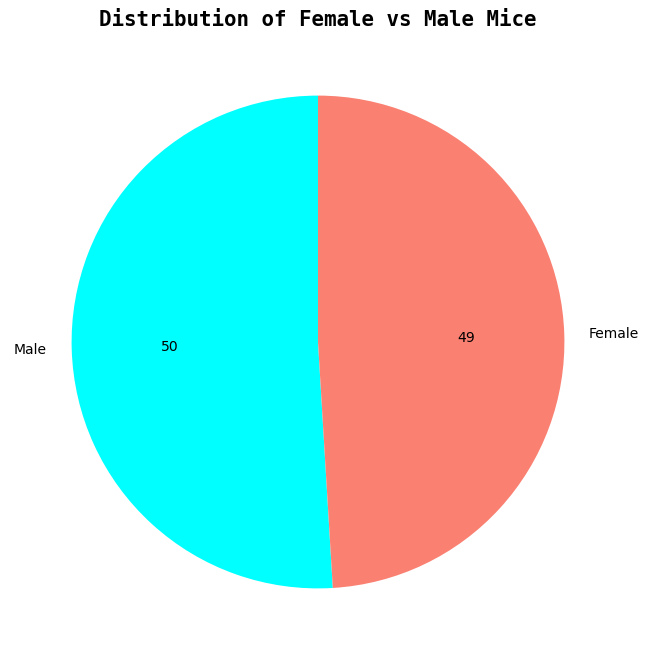

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = list(data2.values)
labels = list(data2.index)

colors = ['cyan', 'salmon']
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, startangle=90, autopct=lambda x: f'{int(x)}')

plt.title('Distribution of Female vs Male Mice', fontsize=15, fontweight="bold", fontname="monospace", loc="center")


plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
import seaborn as sns
clean_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
latest_timepoints = clean_mouse_data.groupby("Mouse ID")["Timepoint"].max().reset_index()
select_columns = clean_mouse_data.loc[:, ["Mouse ID", "Timepoint", "Drug Regimen", "Tumor Volume (mm3)", "Sex"]]

new_df = pd.merge(latest_timepoints, select_columns, on=["Mouse ID", "Timepoint"])

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
select_regimens = select_columns["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
latest_timepoints_select = select_columns.loc[select_regimens].reset_index(drop=True)

latest_timepoints_select.tail()

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3),Sex
809,a644,45,Ramicane,32.978522,Female
810,i177,45,Ramicane,33.562402,Male
811,r944,45,Capomulin,41.581521,Male
812,u364,45,Capomulin,31.023923,Male
813,p438,45,Ceftamin,61.433892,Female


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = latest_timepoints_select['Drug Regimen'].tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = latest_timepoints_select['Tumor Volume (mm3)'].quantile([0.25, 0.75])

q_1 = quartiles.loc[0.25]
q_3 = quartiles.loc[0.75]

IQR = q_3 - q_1

# Determine Outliers 
# I got this code from the Xpert and asking multiple questions to get here
lower_bound = q_1 - 1.5 * IQR
upper_bound = q_3 + 1.5 * IQR

outliers = latest_timepoints_select[(latest_timepoints_select['Tumor Volume (mm3)'] < lower_bound) | (latest_timepoints_select['Tumor Volume (mm3)'] > upper_bound)]

outliers.reset_index()

# There appear to be 16 outliers in the data

,index,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3),Sex
0,680,c139,35,Infubinol,67.821420,Male
1,691,k403,40,Ramicane,24.365505,Male
2,716,k210,40,Ceftamin,66.622836,Male
3,740,i386,40,Infubinol,67.289621,Female
4,744,c139,40,Infubinol,69.428141,Male
5,755,y769,45,Ceftamin,68.594745,Female
6,762,y163,45,Infubinol,67.685569,Female
7,764,c139,45,Infubinol,72.226731,Male
8,768,k483,45,Infubinol,66.196912,Female
9,769,w151,45,Ceftamin,67.527482,Male


In [24]:
quartiles_summary_data = {
    'Quartile 1': [q_1],
    'Quartile 3': [q_3],
    'IQR': [IQR],
    'Lower Bound': [lower_bound],
    'Upper Bound': [upper_bound]
}
quartiles_df = pd.DataFrame(quartiles_summary_data)

quartiles_df

,Quartile 1,Quartile 3,IQR,Lower Bound,Upper Bound
0,40.220171,50.356471,10.1363,25.015721,65.56092


In [25]:
latest_timepoints_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            814 non-null    object 
 1   Timepoint           814 non-null    int64  
 2   Drug Regimen        814 non-null    object 
 3   Tumor Volume (mm3)  814 non-null    float64
 4   Sex                 814 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 31.9+ KB


In [26]:
%who

IQR	 agg_columns	 ax	 clean_mouse_data	 colors	 combined_data	 data	 data2	 duplicate_mouse_drop	 
duplicate_mouse_rows	 labels	 latest_timepoints	 latest_timepoints_select	 lower_bound	 mouse_data	 mouse_metadata	 mouse_metadata_path	 mouse_study_df	 
new_columns	 new_df	 num_mice	 outliers	 pd	 pie	 plt	 q_1	 q_3	 
quartiles	 quartiles_df	 quartiles_summary_data	 select_columns	 select_regimens	 sizes	 sns	 st	 study_results	 
study_results_path	 treatments_list	 tumor_mean	 tumor_median	 tumor_sem	 tumor_std	 tumor_variance	 tumor_vol_data	 upper_bound	 
using_agg_fxn	 x	 y	 


In [27]:
# Locate the rows which contain mice on each drug and get the tumor volumes
data3 = latest_timepoints_select.groupby(['Mouse ID', 'Drug Regimen'])

outliers_list = []

for group_name, group_data in data3:
    mouse_id, drug_regimen = group_name
    tumor_volumes = group_data['Tumor Volume (mm3)']

    # Calculate quartiles and IQR
    Q1 = tumor_volumes.quantile(0.25)
    Q3 = tumor_volumes.quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine outliers using upper and lower bounds
    lower_bound2 = Q1 - 1.5 * IQR
    upper_bound2 = Q3 + 1.5 * IQR
    outliers2 = group_data[(tumor_volumes < lower_bound2) | (tumor_volumes > upper_bound2)]['Tumor Volume (mm3)']

    outliers_list.append(outliers2)

outliers_list

# I'm not sure what I am missing here, but I think I am missing something... please advise


[Series([], Name: Tumor Volume (mm3), dtype: float64),
 Series([], Name: Tumor Volume (mm3), dtype: float64),
 Series([], Name: Tumor Volume (mm3), dtype: float64),
 125    45.466677
 Name: Tumor Volume (mm3), dtype: float64,
 Series([], Name: Tumor Volume (mm3), dtype: float64),
 27    45.0
 Name: Tumor Volume (mm3), dtype: float64,
 Series([], Name: Tumor Volume (mm3), dtype: float64),
 Series([], Name: Tumor Volume (mm3), dtype: float64),
 Series([], Name: Tumor Volume (mm3), dtype: float64),
 Series([], Name: Tumor Volume (mm3), dtype: float64),
 Series([], Name: Tumor Volume (mm3), dtype: float64),
 Series([], Name: Tumor Volume (mm3), dtype: float64),
 79    45.0
 Name: Tumor Volume (mm3), dtype: float64,
 Series([], Name: Tumor Volume (mm3), dtype: float64),
 Series([], Name: Tumor Volume (mm3), dtype: float64),
 Series([], Name: Tumor Volume (mm3), dtype: float64),
 Series([], Name: Tumor Volume (mm3), dtype: float64),
 Series([], Name: Tumor Volume (mm3), dtype: float64),
 Ser

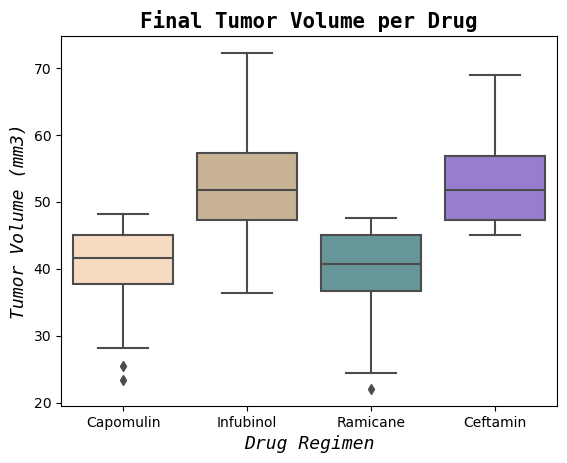

In [28]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
colors = ['peachpuff', 'tan', 'cadetblue', 'mediumpurple']
sns.boxplot(data=latest_timepoints_select, x="Drug Regimen", y="Tumor Volume (mm3)", palette=colors)
plt.title("Final Tumor Volume per Drug", fontsize=15, fontweight="bold", fontname="monospace")
plt.xlabel("Drug Regimen", fontsize=13, fontstyle="italic", fontname="monospace")
plt.ylabel("Tumor Volume (mm3)", fontsize=13, fontstyle="italic", fontname="monospace")
plt.show()

## Line and Scatter Plots

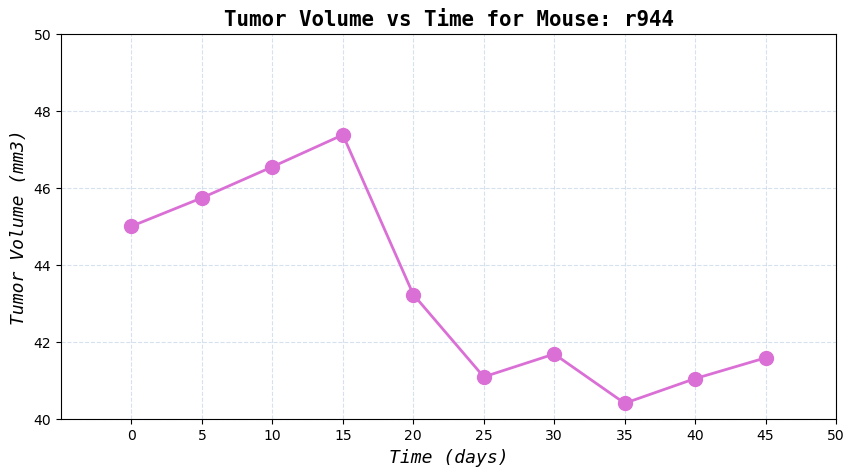

In [29]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin, r944
# I utilized Prof Booths outline for this and adjusted for my mouse choice and preferences in color and style
latest_timepoints_select.loc[latest_timepoints_select["Drug Regimen"] == "Capomulin"]

mouse = "r944"

data = latest_timepoints_select.loc[latest_timepoints_select["Mouse ID"] == mouse]

# get data
time = data["Timepoint"]
y = data["Tumor Volume (mm3)"]

plt.figure(figsize=(10, 5))

plt.plot(time, y, color="orchid", linewidth=2, marker="o", markersize=10)

plt.xlabel("Time (days)", fontsize=13, fontstyle="italic", fontname="monospace")
plt.ylabel("Tumor Volume (mm3)", fontsize=13, fontstyle="italic", fontname="monospace")
plt.title(f"Tumor Volume vs Time for Mouse: {mouse}", fontsize=15, fontweight="bold", fontname="monospace")

plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.xlim(-5, 50)
plt.ylim(40, 50)

plt.grid(color="lightsteelblue", linestyle="--", alpha=0.5)
plt.savefig("Rivers_Mouse.png")
plt.show()

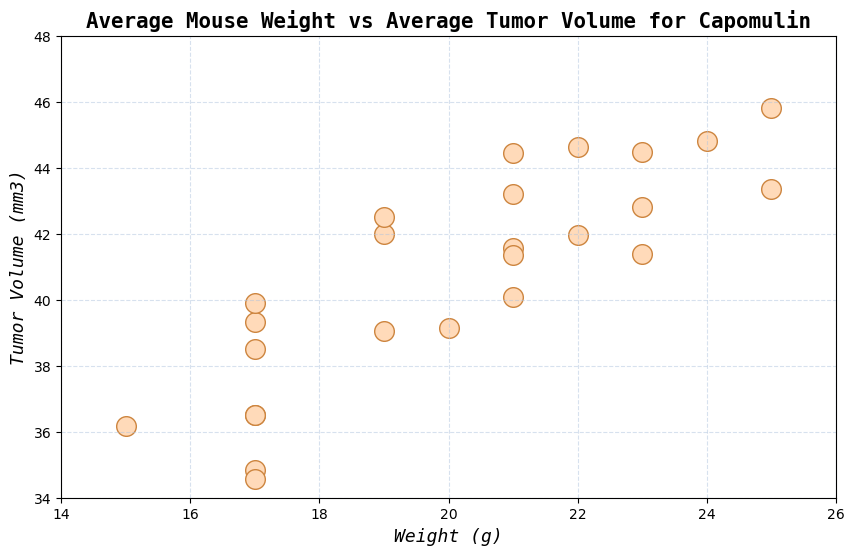

In [30]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
data = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"] == "Capomulin"]

# Utilizing this code from Prof Booth's code
scatter_df = data.groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"}).reset_index()

x = scatter_df["Weight (g)"]
y = scatter_df["Tumor Volume (mm3)"]

plt.figure(figsize=(10, 6))

plt.scatter(x, y, facecolor="peachpuff", edgecolor="peru", s=200)

plt.xlabel("Weight (g)", fontsize=13, fontstyle="italic", fontname="monospace")
plt.ylabel("Tumor Volume (mm3)", fontsize=13, fontstyle="italic", fontname="monospace")
plt.title("Average Mouse Weight vs Average Tumor Volume for Capomulin", fontweight="bold", fontsize=15, fontname="monospace")

plt.xlim(14, 26)
plt.ylim(34, 48)

plt.grid(color="lightsteelblue", linestyle = "--", alpha=0.5)

plt.savefig("Rivers_WvT.png")
plt.show()

## Correlation and Regression

In [31]:
# More Libraries
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from sklearn.metrics import r2_score

In [32]:
# Calculate the correlation coefficient for mouse weight and average observed tumor volume for the entire Capomulin regimen
# I used this code from the Xpert
correlation_coefficient, p_value = stats.pearsonr(x, y)

correlation_coefficient

0.8419363424694719

In [33]:
.84 ** 2

0.7055999999999999

The r-squared is: 0.7088568047708723


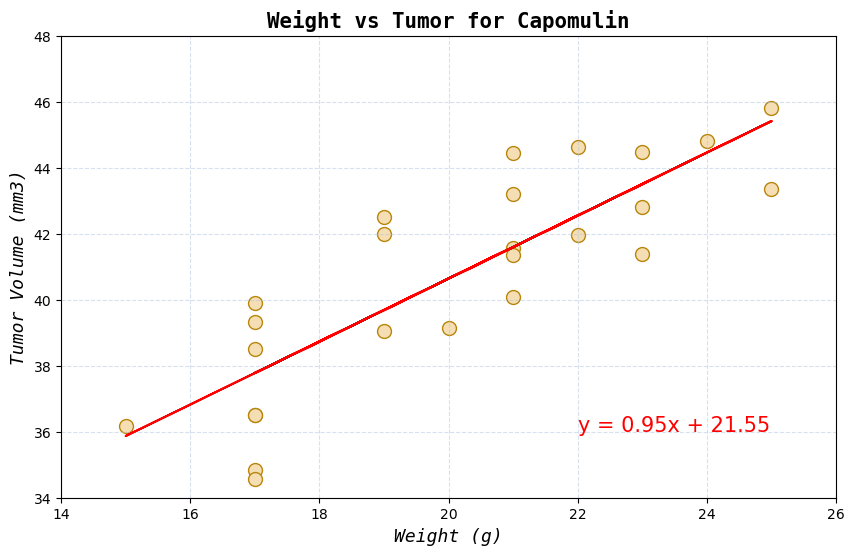

In [34]:
# using Linregress
# starting with Prof Booth's initial code, then modifying where I am able
x_values = scatter_df["Weight (g)"]
y_values = scatter_df["Tumor Volume (mm3)"]

# makes the line of best fit
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make the plot
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, facecolor="wheat", edgecolor="darkgoldenrod", s=100)
plt.plot(x_values, regress_values, "r-")

# Customizations
plt.xlabel("Weight (g)", fontsize=13, fontstyle="italic", fontname="monospace")
plt.ylabel("Tumor Volume (mm3)", fontsize=13, fontstyle="italic", fontname="monospace")
plt.title("Weight vs Tumor for Capomulin", fontsize=15, fontweight="bold", fontname="monospace")
plt.grid(color="lightsteelblue", linestyle = "--", alpha=0.5)

plt.xlim(14, 26)
plt.ylim(34, 48)

plt.annotate(line_eq,(22, 36),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.show()